# Defense Companies Data Analysis and Data Visualization Project

At the start of the project I wanted to analysed industrial or manufacturing data as that was my background.  A dataset search on Kaggle led me to IoT manufacturing sensor data.  Unforturnately, these dataset are simulated dataset and I did not want to work on simulated data.  Then I stumbled upon defense manufacturer's dataset and thought it would be a good idea to study it to gain some insights into their geographical spread, market capitalisation, geopolitical affliations and correlations with global confilicts around the world.

###  Import Libraries

First we need to import the necessary libraries for data analysis, visualisation and predictive analytics

In [ ]:
# Import data analysis and visualisation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualisation style
sns.set(style="whitegrid")

# Import predictive modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

### Data Loading and Exploration

We now load the three datasets collected and begin some initial exploration. The datasets are:

1. All Listed Companies Combined Historical Data (defense-company-industry-data.csv) - this contains historical stock data and dates.
2. SIPRI Top 100 Defense Companies Official List (defense-company-sipri-data.csv) - this contains revenue and rankings.
3. Listed Companies CountryWise Segregation (defense-company-country-data.csv) = this contains categorical data.

In [3]:
# Load datasets
df_historical = pd.read_csv('dataset/defense-company-industry-data.csv')
df_sipri = pd.read_csv('dataset/defense-company-sipri-data.csv')
df_country = pd.read_csv('dataset/defense-company-country-data.csv')

In [4]:
# Display first few rows of each dataset
print(f"Historical Data:\n{df_historical.head()}\n")
print(f"SIPRI Data:\n{df_sipri.head()}\n")
print(f"Country Data:\n{df_country.head()}\n")

Historical Data:
         Date     Close      High       Low      Open  Volume  \
0  04-01-2010  32739.60  32872.69  31907.80  31941.07  497685   
1  05-01-2010  32839.41  33338.49  32673.05  33005.77  469946   
2  06-01-2010  33671.21  34469.74  33072.32  33072.32  636395   
3  07-01-2010  33538.13  34403.20  33405.04  33937.39  423084   
4  08-01-2010  33671.21  34203.56  33039.05  34203.56  502115   

            Company Name  
0  Lockheed Martin Corp.  
1  Lockheed Martin Corp.  
2  Lockheed Martin Corp.  
3  Lockheed Martin Corp.  
4  Lockheed Martin Corp.  

SIPRI Data:
   Rank (2023)  Rank (2022)            Company Name         Country  \
0            1            1   Lockheed Martin Corp.   United States   
1            2            2                     RTX   United States   
2            3            3  Northrop Grumman Corp.   United States   
3            4            4                  Boeing   United States   
4            5            5  General Dynamics Corp.   United S

In [5]:
# Display information about each dataset
print(f"Historical Data Info: \n{df_historical.info()}\n")
print(f"SIPRI Data Info: \n{df_sipri.info()}\n")   
print(f"Country Data Info: \n{df_country.info()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242748 entries, 0 to 242747
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          242748 non-null  object 
 1   Close         242748 non-null  float64
 2   High          242748 non-null  float64
 3   Low           242748 non-null  float64
 4   Open          242748 non-null  float64
 5   Volume        242748 non-null  int64  
 6   Company Name  242748 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 13.0+ MB
Historical Data Info: 
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rank (2023)                         100 non-null    int64  
 1   Rank (2022)                         100 non-null    int64  
 2   Company Name                      

In [6]:
# Display information about the shape of each dataset
print(f"Historical Data Shape: {df_historical.shape}")
print(f"SIPRI Data Shape: {df_sipri.shape}")
print(f"Country Data Shape: {df_country.shape}")

Historical Data Shape: (242748, 7)
SIPRI Data Shape: (100, 8)
Country Data Shape: (22, 7)


In [7]:
# Display a summary statistics of each dataset
print(f"Historical Data Summary:\n{df_historical.describe()}\n")
print(f"SIPRI Data Summary:\n{df_sipri.describe()}\n")
print(f"Country Data Summary:\n{df_country.describe()}\n")

Historical Data Summary:
               Close           High            Low           Open  \
count  242748.000000  242748.000000  242748.000000  242748.000000   
mean     2686.110308    2738.272788    2637.739601    2687.455562   
std     16710.323525   17093.516394   16344.206482   16715.277203   
min         0.280000       0.280000       0.260000       0.280000   
25%        33.780000      34.190000      33.330000      33.760000   
50%        84.940000      85.850000      83.940000      84.900000   
75%       270.820000     274.320000     267.660000     270.960000   
max    631000.000000  650000.000000  623000.000000  648000.000000   

             Volume  
count  2.427480e+05  
mean   3.934135e+06  
std    1.188797e+07  
min    0.000000e+00  
25%    3.439000e+05  
50%    1.080288e+06  
75%    3.291862e+06  
max    6.304517e+08  

SIPRI Data Summary:
       Rank (2023)  Rank (2022)  Arms Revenue 2023 (in Million $)  \
count   100.000000   100.000000                        100.000000

### Data Cleaning and Preprocessing

The next step is to clean the data and prepare it for data visualisation and predictive analytics. The datasets are fairly clean and complete. But the date needs changing to datetime data type.  We will also look at missing values and drop them where possible.

In [8]:
# Import data preprocessing libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



In [9]:
# Check for missing values in each dataset
print(f"Historical Data Missing Values:\n{df_historical.isnull().sum()}\n")
print(f"SIPRI Data Missing Values:\n{df_sipri.isnull().sum()}\n")
print(f"Country Data Missing Values:\n{df_country.isnull().sum()}\n")



Historical Data Missing Values:
Date            0
Close           0
High            0
Low             0
Open            0
Volume          0
Company Name    0
dtype: int64

SIPRI Data Missing Values:
Rank (2023)                           0
Rank (2022)                           0
Company Name                          0
Country                               0
Arms Revenue 2023 (in Million $)      0
Arms Revenue 2022 (in Million $)      0
Total Revenue 2023 (in Million $)     3
Arms Revenue as % of Total Revenue    3
dtype: int64

Country Data Missing Values:
Country         0
Continent       0
Income Level    0
G7              0
G20             0
NATO            0
EU              0
dtype: int64



In [11]:
# date cleaning and preprocessing
df_historical['Date'] = pd.to_datetime(df_historical['Date'], format='%d-%m-%Y', errors='coerce')
df_historical.dropna(inplace=True)
df_sipri.dropna(inplace=True)
df_country.dropna(inplace=True)

In [12]:
# Let us now re-check for missing values in the SIPRI dataset
print(f"SIPRI Data Missing Values:\n{df_sipri.isnull().sum()}\n")

SIPRI Data Missing Values:
Rank (2023)                           0
Rank (2022)                           0
Company Name                          0
Country                               0
Arms Revenue 2023 (in Million $)      0
Arms Revenue 2022 (in Million $)      0
Total Revenue 2023 (in Million $)     0
Arms Revenue as % of Total Revenue    0
dtype: int64



In [13]:
# let us now check the data types again
print(f"SIPRI Data Types:\n{df_sipri.dtypes}\n")
print(f"Historical Data Types:\n{df_historical.dtypes}\n")
print(f"Country Data Types:\n{df_country.dtypes}\n")

SIPRI Data Types:
Rank (2023)                             int64
Rank (2022)                             int64
Company Name                           object
Country                                object
Arms Revenue 2023 (in Million $)        int64
Arms Revenue 2022 (in Million $)        int64
Total Revenue 2023 (in Million $)     float64
Arms Revenue as % of Total Revenue     object
dtype: object

Historical Data Types:
Date            datetime64[ns]
Close                  float64
High                   float64
Low                    float64
Open                   float64
Volume                   int64
Company Name            object
dtype: object

Country Data Types:
Country         object
Continent       object
Income Level    object
G7              object
G20             object
NATO            object
EU              object
dtype: object



In [14]:
# let us now check the first few rows again after cleaning
print(f"Historical Data After Cleaning:\n{df_historical.head()}\n")

Historical Data After Cleaning:
        Date     Close      High       Low      Open  Volume  \
0 2010-01-04  32739.60  32872.69  31907.80  31941.07  497685   
1 2010-01-05  32839.41  33338.49  32673.05  33005.77  469946   
2 2010-01-06  33671.21  34469.74  33072.32  33072.32  636395   
3 2010-01-07  33538.13  34403.20  33405.04  33937.39  423084   
4 2010-01-08  33671.21  34203.56  33039.05  34203.56  502115   

            Company Name  
0  Lockheed Martin Corp.  
1  Lockheed Martin Corp.  
2  Lockheed Martin Corp.  
3  Lockheed Martin Corp.  
4  Lockheed Martin Corp.  



In [15]:
# Let us now check the last few rows after cleaning
print(f"Historical Data After Cleaning:\n{df_historical.tail()}\n")

Historical Data After Cleaning:
             Date  Close   High    Low   Open  Volume  Company Name
242743 2025-10-17  56.24  57.26  55.89  56.19  187800  ThyssenKrupp
242744 2025-10-20  58.97  59.07  57.35  57.37  173400  ThyssenKrupp
242745 2025-10-21  59.52  59.65  58.16  58.56  190400  ThyssenKrupp
242746 2025-10-22  58.19  59.43  57.87  59.15  235700  ThyssenKrupp
242747 2025-10-23  60.11  60.49  58.50  58.56  193100  ThyssenKrupp



In [16]:
# Let us now check the shapes of the datasets after cleaning
print(f"Historical Data Shape After Cleaning: {df_historical.shape}")

Historical Data Shape After Cleaning: (242748, 7)


### Data Visualisation

We now explore the datasets using a number of data visualisation techniques.  We start with the basic ones and end with the more interesting ones to see if we can gain insights from the distributions, relationships, correlationships and differences that may exist among some of the features of the dataset to see if we can infer their effects on complicts around the world.

Text(0.5, 0.98, 'Histograms of Numerical Features in Historical Dataset')

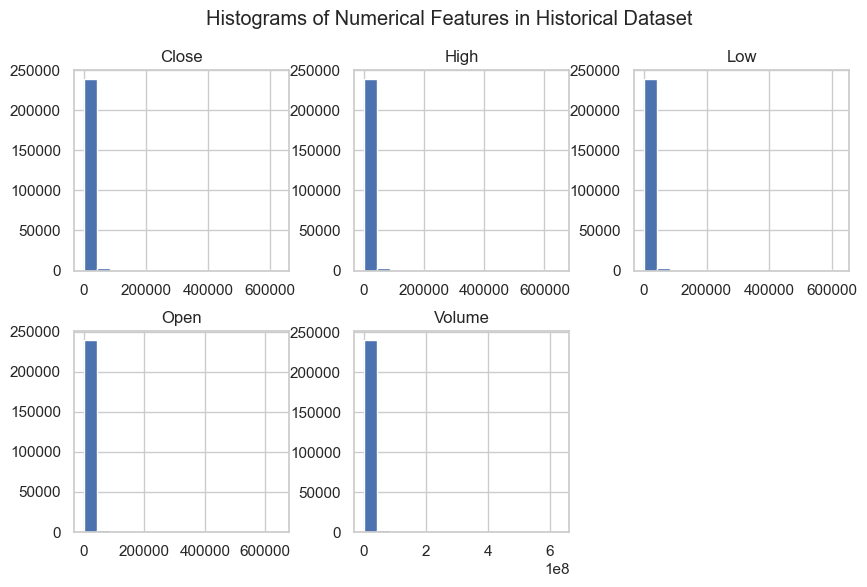

In [17]:
# Let us now look at data visualisation

# let us plot histograms for numerical features in the historical dataset
numerical_features = df_historical.select_dtypes(include=['int64', 'float64']).columns
df_historical[numerical_features].hist(bins=15, figsize=(10, 6), layout=(2, 3))
plt.suptitle('Histograms of Numerical Features in Historical Dataset')


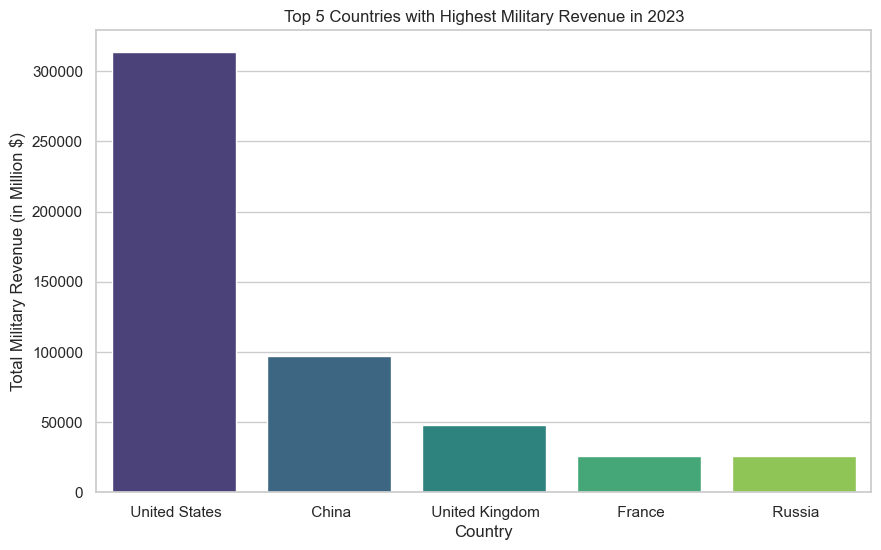

In [39]:
# Let us now look at the top 5 countries with the highest military revenue from the SIPRI dataset
top_countries = df_sipri.groupby('Country')['Arms Revenue 2023 (in Million $)'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis', hue=top_countries.index)
plt.title('Top 5 Countries with Highest Military Revenue in 2023')
plt.xlabel('Country')
plt.ylabel('Total Military Revenue (in Million $)')
plt.show()

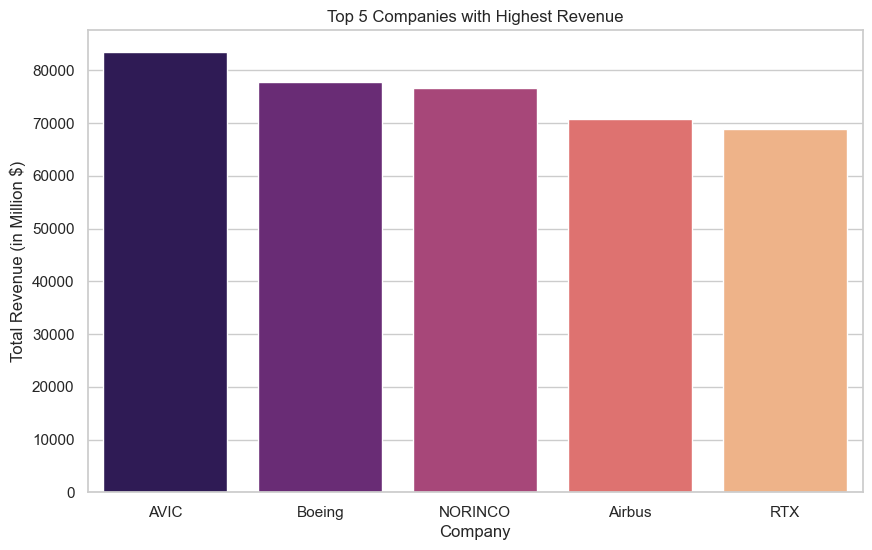

In [45]:
# Let us now at the top 5 companies with the highest revenue from the SIPRI dataset
top_companies = df_sipri.groupby('Company Name')['Total Revenue 2023 (in Million $)'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.index, y=top_companies.values, palette='magma', hue=top_companies.index)
plt.title('Top 5 Companies with Highest Revenue')
plt.xlabel('Company')
plt.ylabel('Total Revenue (in Million $)')
plt.show()

In [49]:
# Let us now look at the top 5 companies and their countries from the SIPRI dataset
top_companies_countries = df_sipri.groupby('Company Name')['Country'].first().loc[top_companies.index]
for company, country in top_companies_countries.items():
    print(f"{company}: {country}")


AVIC:  China
Boeing:  United States
NORINCO:  China
Airbus: Trans-Europeanh
RTX:  United States


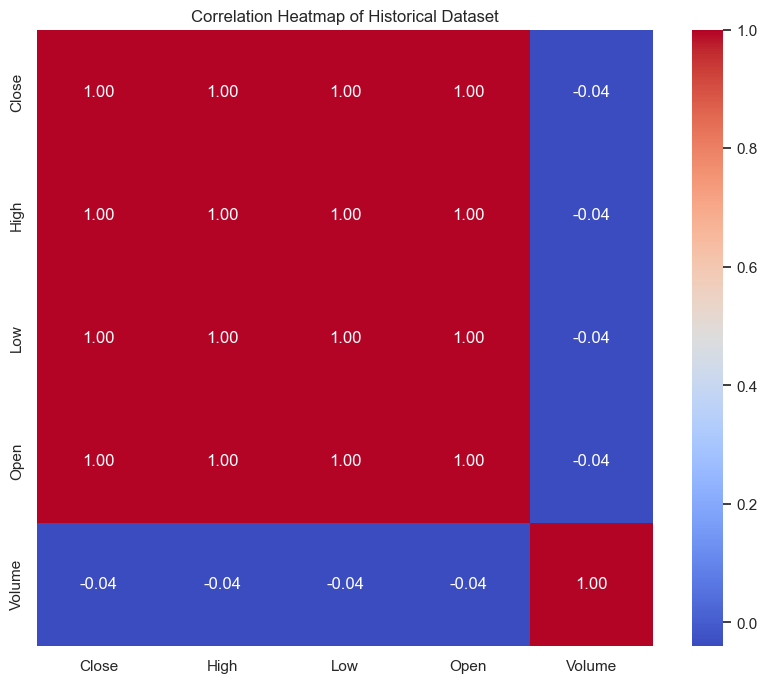

In [87]:
# Let us now at the correlation heatmap for the historical dataset
numerical_features = df_historical.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
correlation_matrix = df_historical[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Historical Dataset') 
plt.show()

Text(0, 0.5, 'Count')

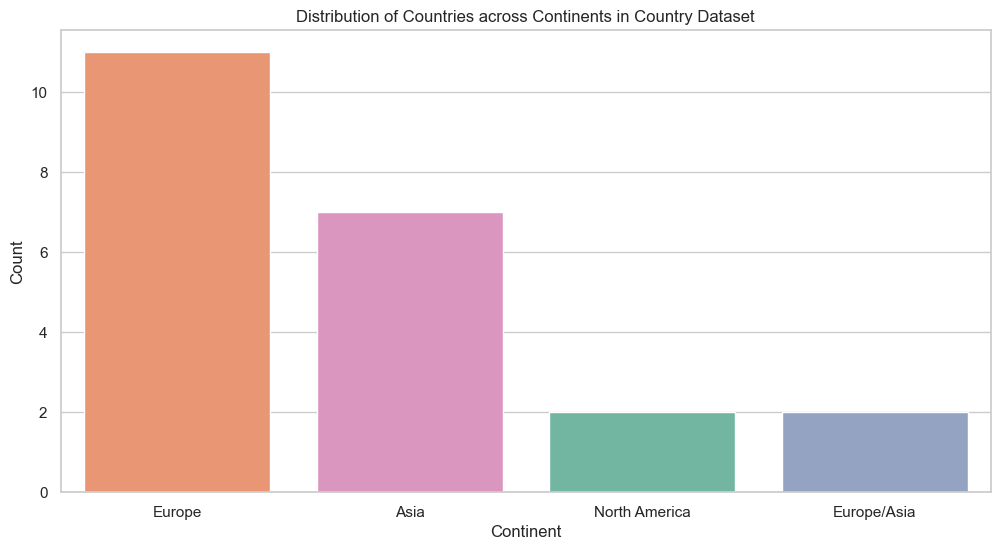

In [108]:
# Let us now look at the distribution of countries and their geopolitical groups in the country dataset
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.countplot(data=df_country, x='Continent', order=df_country['Continent'].value_counts().index, hue='Continent', legend=False, palette='Set2')
plt.title('Distribution of Countries across Continents in Country Dataset')
plt.xlabel('Continent')
plt.ylabel('Count')
#sns.countplot(data=df_country, x=['Continent', 'EU', 'NATO', 'G7', 'G20'], order=df_country[x]['Country'].value_counts().index, hue=['Continent', 'EU', 'NATO', 'G7', 'G20'], legend=False, palette='Set2')
#plt.title('Distribution of Countries across Geopolitical Groups in Country Dataset')
#plt.xlabel('Geopolitical Groups')
#plt.ylabel('Count')






### Predictive Analytics

A simple predictive analytics model will now be build to predict the volume of trade using features such as the the Open, Close, Low and High of the stock price.  A linear regression model will be used for the prediction and the model's performance will be evaluated using the R</sup 2> score and RMSE.

In [113]:
# let us now prepare the data for predictive analytics
features_data = df_historical.drop(columns=['Date', 'Volume', 'Company Name'])
target_data = df_historical['Volume']


In [118]:
# We now drop rows with any missing values in the features and target data
df_model = df_historical.dropna(subset=features_data.columns.tolist() + [target_data.name])



In [119]:
# Now we define the features and target variables for the model
x = df_model[features_data.columns]
y = df_model[target_data.name]

In [120]:
# Now we will split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# We will now create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# We will now make predictions on the test set
y_pred = model.predict(X_test)

In [121]:
# Finally, we will evaluate the model's performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Linear Regression Model Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Linear Regression Model Performance:
Root Mean Squared Error (RMSE): 11163139.803326938
R² Score: 0.0017490937643889204
